**Import Modules**

In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve, validation_curve # splitting the data
from sklearn.metrics import accuracy_score, r2_score, f1_score, precision_score, recall_score # model precision
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import confusion_matrix # confusion matrix
import seaborn as sns
import itertools
import numpy as np

**Load DataSet**

In [2]:
dataset = pd.read_csv("StdCoronaData.csv")
dataset=dataset.drop(['Unnamed: 0'],axis=1)

In [3]:
dataset

,high_risk_exposure_occupation,high_risk_interactions,age,smoker,temperature,cough,fever,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,diagnosis
0,1.000000,0.205514,58.0,0.0,36.95,1.0,0.028477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.205514,35.0,0.0,36.75,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.073903,0.205514,12.0,0.0,36.95,0.0,0.028477,0.030302,0.020222,0.065147,0.057786,0.007068,0.007206,0.036873,0.036136,0.062977,0
3,1.000000,1.000000,46.0,0.0,36.75,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0
4,0.000000,0.205514,-1.0,0.0,36.25,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185359,0.000000,1.000000,23.0,0.0,36.90,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
185360,0.000000,0.000000,12.0,0.0,37.00,0.0,0.028477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
185361,0.000000,1.000000,32.0,0.0,36.95,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
185362,0.000000,1.000000,37.0,0.0,36.70,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1


**Target Selection**

In [4]:
X= dataset.drop(['diagnosis'],axis=1)
y= dataset['diagnosis']

**Split Train and Test**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**ML Models**

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

**ML Results**

In [7]:
model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]
pred_lr = model_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, pred_lr)
print('Accuracy (Logistic Regression) : %.3f ' % accuracy_score(y_test,pred_lr))
print('R2Score (Logistic Regression) : %.3f ' % r2_score(y_test,pred_lr))
print('F1-Score (Logistic Regression) : %.3f ' % f1_score(y_test,pred_lr))
#print('Accuracy (Logistic Regression) : %.3f ' % model_lr.score(X_test, y_test))

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]
pred_dt = model_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, pred_dt)
print('Accuracy (Decision Tree) : %.3f ' % accuracy_score(y_test,pred_dt))
print('R2Score (Decision Tree) : %.3f ' % r2_score(y_test,pred_dt))
print('F1-Score (Decision Tree) : %.3f ' % f1_score(y_test,pred_dt))
#print('Accuracy (Decision Tree) : %.3f ' % model_dt.score(X_test, y_test))


model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]
pred_rf = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, pred_rf)
print('Accuracy (Random Forest) : %.3f ' % accuracy_score(y_test,pred_rf))
print('R2Score (Random Forest) : %.3f ' % r2_score(y_test,pred_rf))
print('F1-Score (Random Forest) : %.3f ' % f1_score(y_test,pred_rf))
#print('Accuracy (Random Forest) : %.3f ' % model_rf.score(X_test, y_test))

model_xg = XGBClassifier().fit(X_train, y_train)
probs_xg = model_xg.predict_proba(X_test)[:, 1]
pred_xg = model_xg.predict(X_test)
cm_xg = confusion_matrix(y_test, pred_xg)
print('Accuracy (XGBoost) : %.3f ' % accuracy_score(y_test,pred_xg))
print('R2Score (XGBoost) : %.3f ' % r2_score(y_test,pred_xg))
print('F1-Score (XGBoost) : %.3f ' % f1_score(y_test,pred_xg))
#print('Accuracy (XGBoost) : %.3f ' % model_xg.score(X_test, y_test))

model_knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
probs_knn = model_knn.predict_proba(X_test)[:, 1] 
pred_knn = model_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, pred_knn)
print('Accuracy (KNeighbors) : %.3f ' % accuracy_score(y_test,pred_knn))
print('R2Score (KNeighbors) : %.3f ' % r2_score(y_test,pred_knn))
print('F1-Score (KNeighbors) : %.3f ' % f1_score(y_test,pred_knn))
#print('Accuracy (KNeighbors) : %.3f ' % model_knn.score(X_test, y_test))

model_nb = GaussianNB().fit(X_train, y_train)
probs_nb = model_nb.predict_proba(X_test)[:, 1] 
pred_nb = model_nb.predict(X_test)
cm_nb = confusion_matrix(y_test, pred_nb)
print('Accuracy (GaussianNB) : %.3f ' % accuracy_score(y_test,pred_nb))
print('R2Score (GaussianNB) : %.3f ' % r2_score(y_test,pred_nb))
print('F1-Score (GaussianNB) : %.3f ' % f1_score(y_test,pred_nb))
#print('Accuracy (GaussianNB) : %.3f ' % model_nb.score(X_test, y_test))

model_lda = LDA(n_components=1).fit(X_train, y_train)
probs_lda = model_lda.predict_proba(X_test)[:, 1] 
pred_lda = model_lda.predict(X_test)
cm_lda = confusion_matrix(y_test, pred_lda)
print('Accuracy (LinearDiscriminantAnalysis) : %.3f ' % accuracy_score(y_test,pred_lda))
print('R2Score (LinearDiscriminantAnalysis) : %.3f ' % r2_score(y_test,pred_lda))
print('F1-Score (LinearDiscriminantAnalysis) : %.3f ' % f1_score(y_test,pred_lda))
#print('Accuracy (LinearDiscriminantAnalysis) : %.3f ' % model_lda.score(X_test, y_test))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Logistic Regression) : 0.692 
R2Score (Logistic Regression) : -0.233 
F1-Score (Logistic Regression) : 0.618 
Accuracy (Decision Tree) : 0.928 
R2Score (Decision Tree) : 0.712 
F1-Score (Decision Tree) : 0.929 
Accuracy (Random Forest) : 0.932 
R2Score (Random Forest) : 0.730 
F1-Score (Random Forest) : 0.933 


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:44:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (XGBoost) : 0.849 
R2Score (XGBoost) : 0.397 
F1-Score (XGBoost) : 0.844 
Accuracy (KNeighbors) : 0.908 
R2Score (KNeighbors) : 0.631 
F1-Score (KNeighbors) : 0.910 
Accuracy (GaussianNB) : 0.669 
R2Score (GaussianNB) : -0.325 
F1-Score (GaussianNB) : 0.581 
Accuracy (LinearDiscriminantAnalysis) : 0.699 
R2Score (LinearDiscriminantAnalysis) : -0.204 
F1-Score (LinearDiscriminantAnalysis) : 0.631 


**ROC Curves for all ML Models**

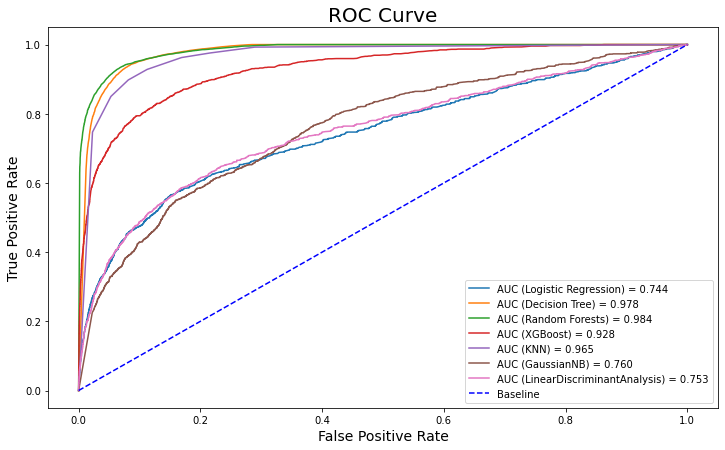

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve

y_test_int = y_test
auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_dt = roc_auc_score(y_test_int, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_int, probs_dt)

auc_rf = roc_auc_score(y_test_int, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, probs_rf)

auc_xg = roc_auc_score(y_test_int, probs_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test_int, probs_xg)

auc_knn = roc_auc_score(y_test_int, probs_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_int, probs_knn)

auc_nb = roc_auc_score(y_test_int, probs_nb)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_int, probs_nb)

auc_lda = roc_auc_score(y_test_int, probs_lda)
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test_int, probs_lda)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.3f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.3f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.3f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.3f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {auc_knn:.3f}')
plt.plot(fpr_nb, tpr_nb, label=f'AUC (GaussianNB) = {auc_nb:.3f}')
plt.plot(fpr_lda, tpr_lda, label=f'AUC (LinearDiscriminantAnalysis) = {auc_lda:.3f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [9]:
print('AUC (Logistic Regression) : %.3f ' % auc_lr)
print('AUC (Decision Tree) : %.3f ' % auc_dt)
print('AUC (Random Forest) : %.3f ' % auc_rf)
print('AUC (XGBoost) : %.3f ' % auc_xg)
print('AUC (KNeighbors) : %.3f ' % auc_knn)
print('AUC (GaussianNB) : %.3f ' % auc_nb)
print('AUC (LinearDiscriminantAnalysis) : %.3f ' % auc_lda)

AUC (Logistic Regression) : 0.744 
AUC (Decision Tree) : 0.978 
AUC (Random Forest) : 0.984 
AUC (XGBoost) : 0.928 
AUC (KNeighbors) : 0.965 
AUC (GaussianNB) : 0.760 
AUC (LinearDiscriminantAnalysis) : 0.753 


**CM for all ML Models**

In [10]:
def plot_cm(y_true, y_pred, figsize=(5,5), titre='Matrix Confusion'):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(titre, size = 12)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

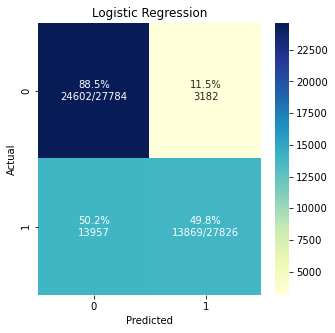

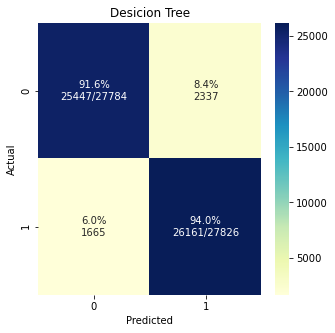

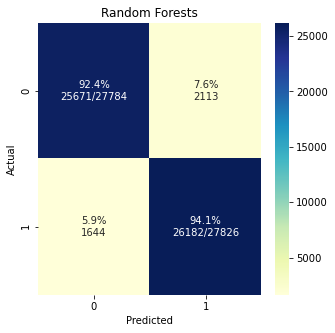

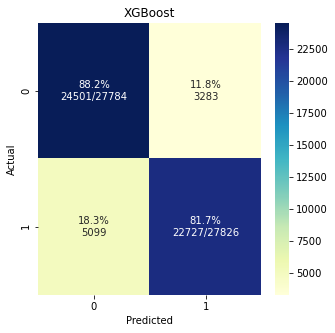

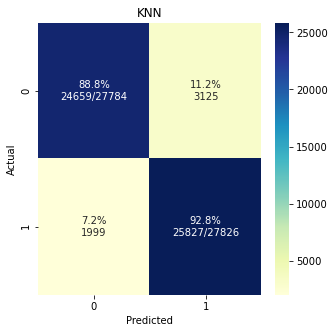

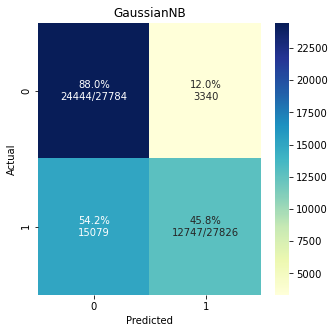

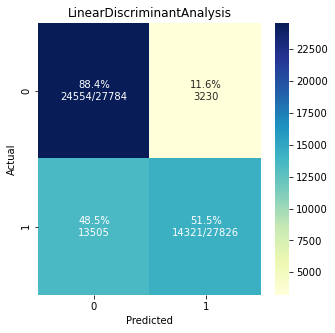

In [11]:
plot_cm(y_test_int, pred_lr, titre='Logistic Regression')
plot_cm(y_test_int, pred_dt, titre='Desicion Tree')
plot_cm(y_test_int, pred_rf, titre='Random Forests')
plot_cm(y_test_int, pred_xg, titre='XGBoost')
plot_cm(y_test_int, pred_knn, titre='KNN')
plot_cm(y_test_int, pred_nb, titre='GaussianNB')
plot_cm(y_test_int, pred_lda, titre='LinearDiscriminantAnalysis')

**Features importances for RF Classifier**

In [12]:
model_rf.feature_importances_

array([0.01882586, 0.04673169, 0.34666711, 0.01183229, 0.25624931,
       0.07588858, 0.06583951, 0.01265373, 0.0082739 , 0.01618368,
       0.03049103, 0.03375483, 0.02221396, 0.01438999, 0.02322524,
       0.01677931])

<BarContainer object of 16 artists>

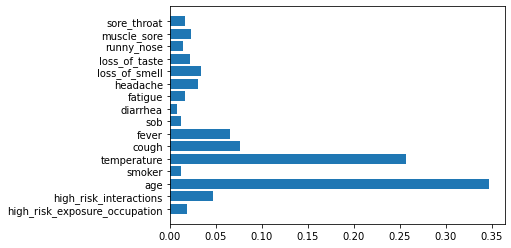

In [13]:
plt.barh(X.columns, model_rf.feature_importances_)

**Performance and Validation of RF Classifier**

In [14]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


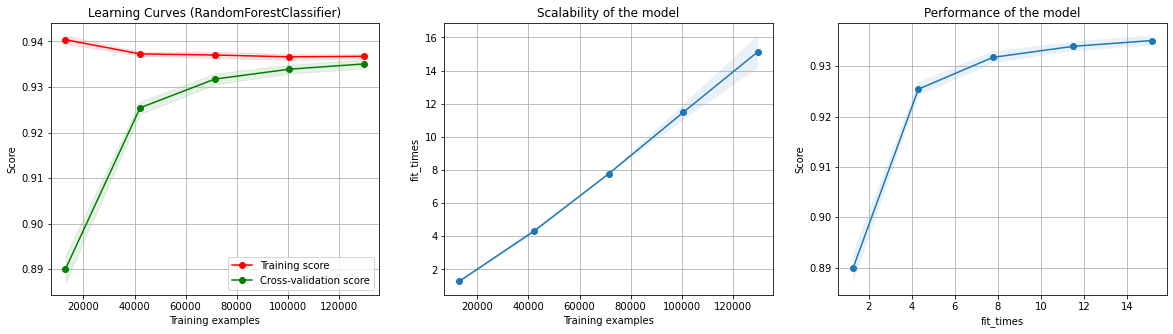

In [15]:
title = f"Learning Curves (RandomForestClassifier)"
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
estimator = RandomForestClassifier()
plot_learning_curve(
    estimator, title, X, y, cv=cv, n_jobs=4
)

plt.show()

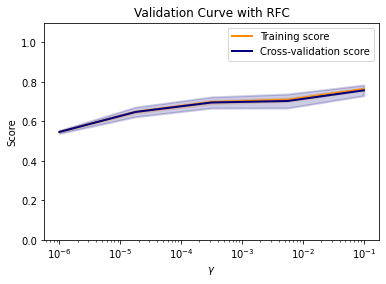

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(),
    X,
    y,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RFC")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

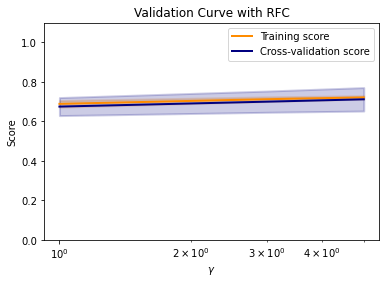

In [19]:
param_range = np.linspace(1, 5, 3)
train_scores, test_scores = validation_curve(
    estimator,
    X,
    y,
    param_name="max_depth",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RFC")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

In [25]:
X_train=X_train.values

In [26]:
X_test=X_test.values

In [27]:
y_train=y_train.values

In [28]:
y_test=y_test.values

In [29]:
# Define Algorithm 
# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
    estimator, X_train, y_train, X_test, y_test, 
    loss='0-1_loss',
    random_seed=123,
    num_rounds=1000)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

Average Expected Loss: 0.0694n
Average Bias: 0.0683
Average Variance: 0.0065
